In [2]:
from PIL import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Extract the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving ds_salaries.csv to ds_salaries.csv


In [4]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [7]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
df.shape

(607, 12)

In [10]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [11]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
df_original = df.copy()

In [15]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
duplicate_rows = df.duplicated()
df[duplicate_rows].head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [16]:
df.drop_duplicates(inplace = True)
df.drop(columns=['salary', 'salary_currency'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


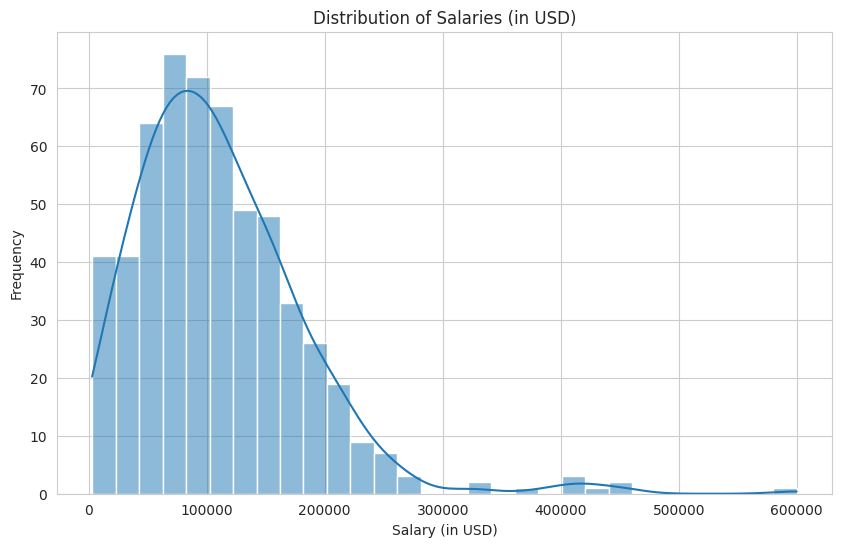

In [18]:
sns.set_style('whitegrid')

# Distribution of salaries in USD
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], bins = 30, kde = True)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()

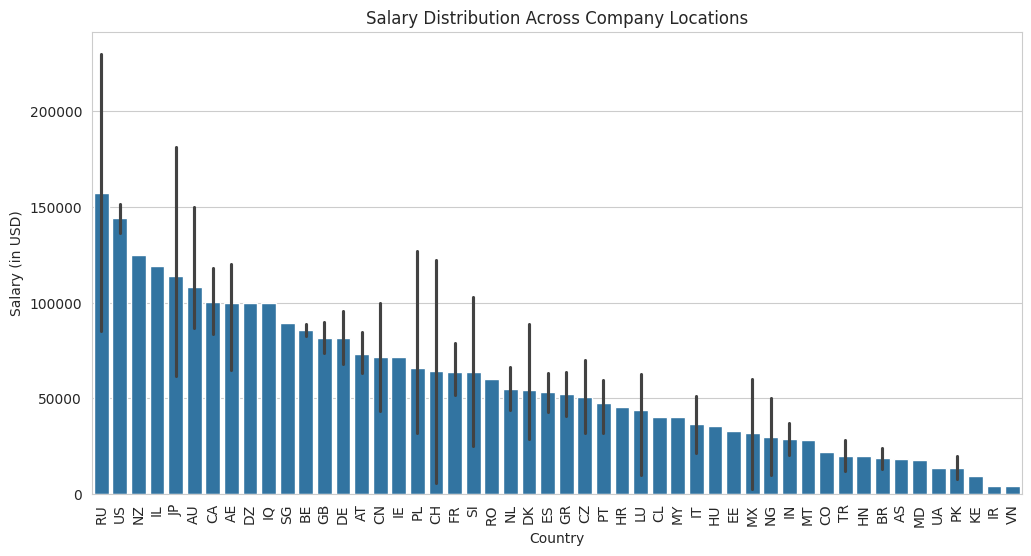

In [19]:
# PLOTTING SALARY Vs COMPANY LOCATION
sorted_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=df, order=sorted_countries)
plt.title('Salary Distribution Across Company Locations')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)
plt.show()

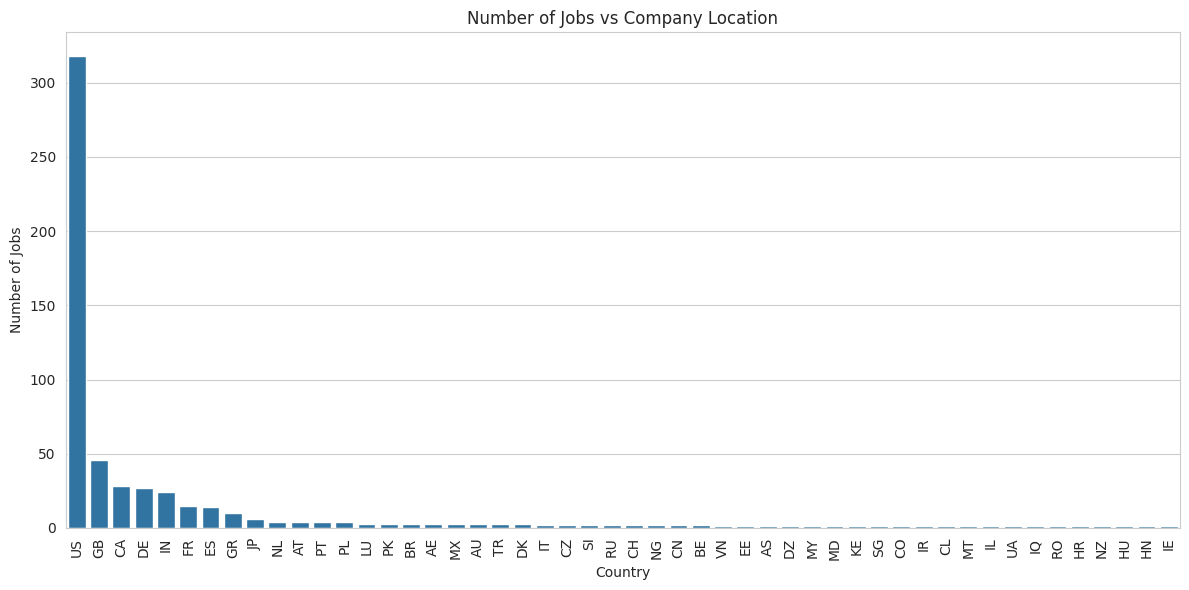

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='company_location', data=df, order=df['company_location'].value_counts().index)

plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs vs Company Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

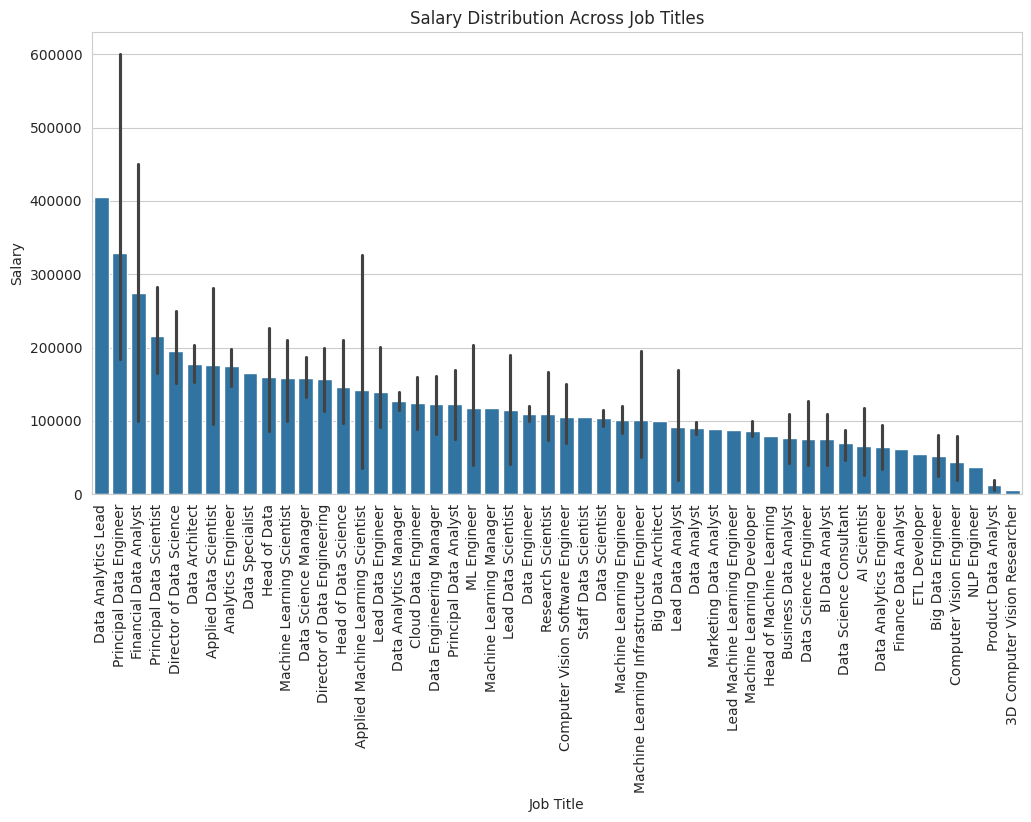

In [21]:
sorted_roles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, order=sorted_roles)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

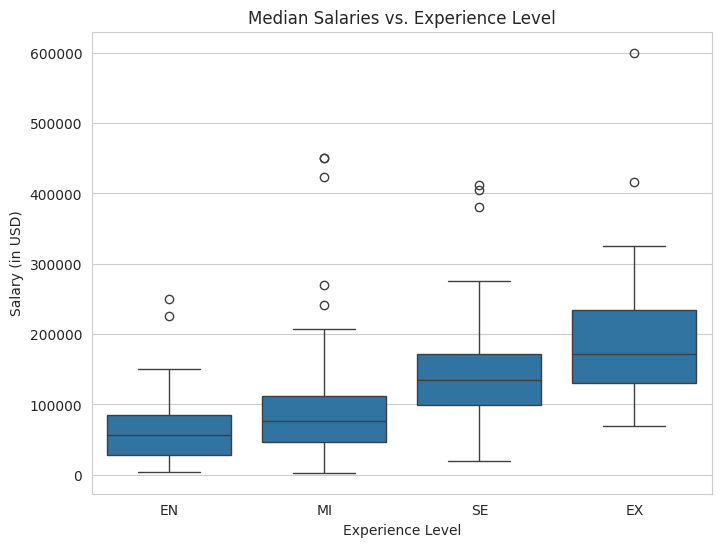

In [22]:
sorted_exp = ['EN', 'MI', 'SE', 'EX'] #Order by Seniority
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=sorted_exp)
plt.title('Median Salaries vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()

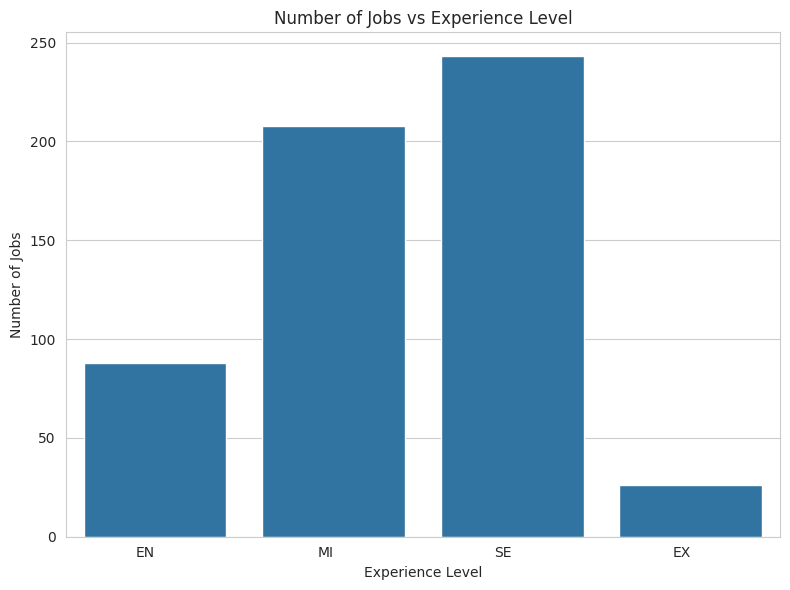

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='experience_level', data=df, order=sorted_exp)

plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs vs Experience Level')
plt.xticks(rotation=0, ha="right")

plt.tight_layout()
plt.show()

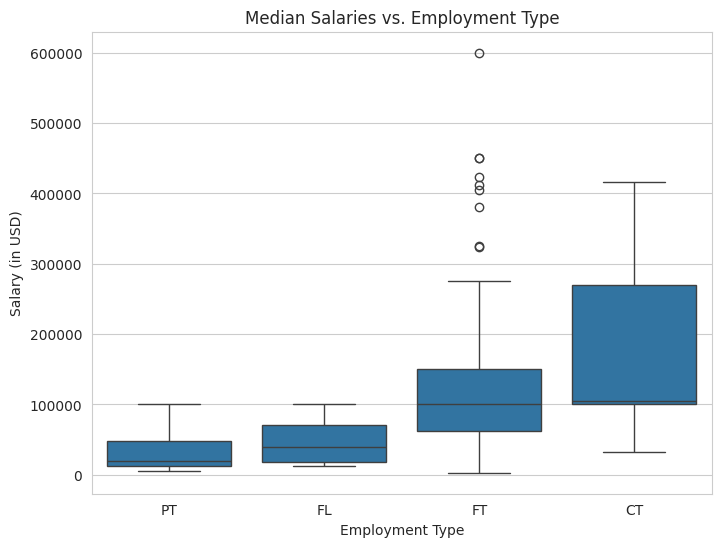

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', order=df.groupby('employment_type')['salary_in_usd'].median().sort_values().index)
plt.title('Median Salaries vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.show()

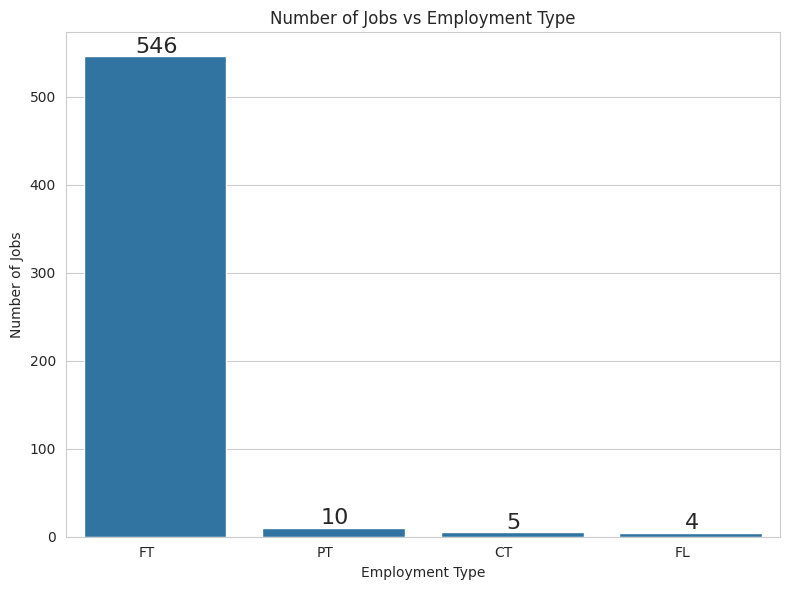

In [25]:
sorted_emp = df['employment_type'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', data=df, order=sorted_emp)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(1, 7),
                textcoords='offset points',
                fontsize=16)

plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")
plt.title('Number of Jobs vs Employment Type')

plt.tight_layout()
plt.show()



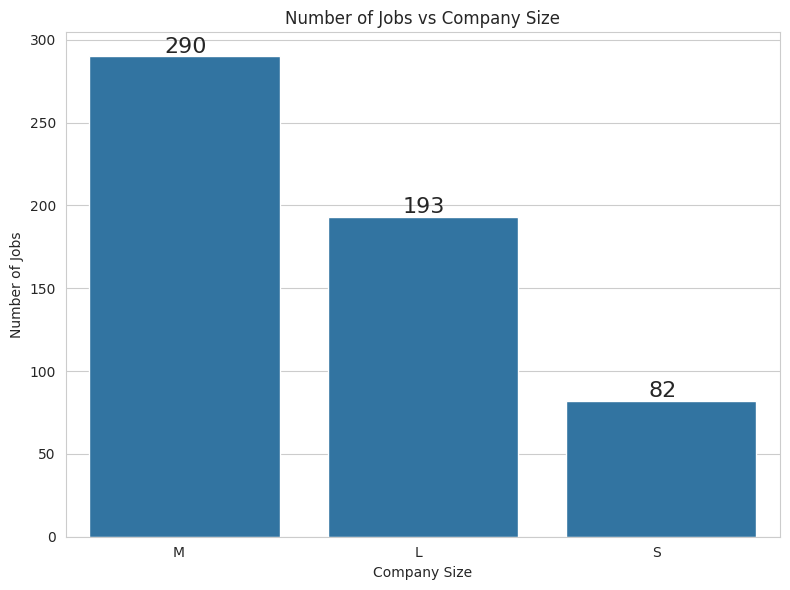

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='company_size', data=df, order=df['company_size'].value_counts().index)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(1, 7), textcoords='offset points', fontsize=16)

plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0, ha="right")
plt.title('Number of Jobs vs Company Size')

plt.tight_layout()
plt.show()

In [27]:
threshold = 10

# Replace values with 'Other' if count is below threshold
replace_with_other = lambda col: col.replace(col.value_counts()[col.value_counts() < threshold].index, 'Other')
df['employee_residence'] = replace_with_other(df['employee_residence'])
df['company_location'] = replace_with_other(df['company_location'])
df['job_title'] = replace_with_other(df['job_title'])

# One-hot Encoding
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'employee_residence', 'company_location', 'company_size', 'job_title'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(df_encoded[['salary_in_usd', 'remote_ratio']])

df_encoded.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,employee_residence_DE,...,company_location_US,company_size_M,company_size_S,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Other,job_title_Research Scientist
0,2020,-0.426180,-1.710815,False,True,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
1,2020,2.068630,-1.710815,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2020,-0.021966,-0.487257,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,2020,-1.254701,-1.710815,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2020,0.545437,-0.487257,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False


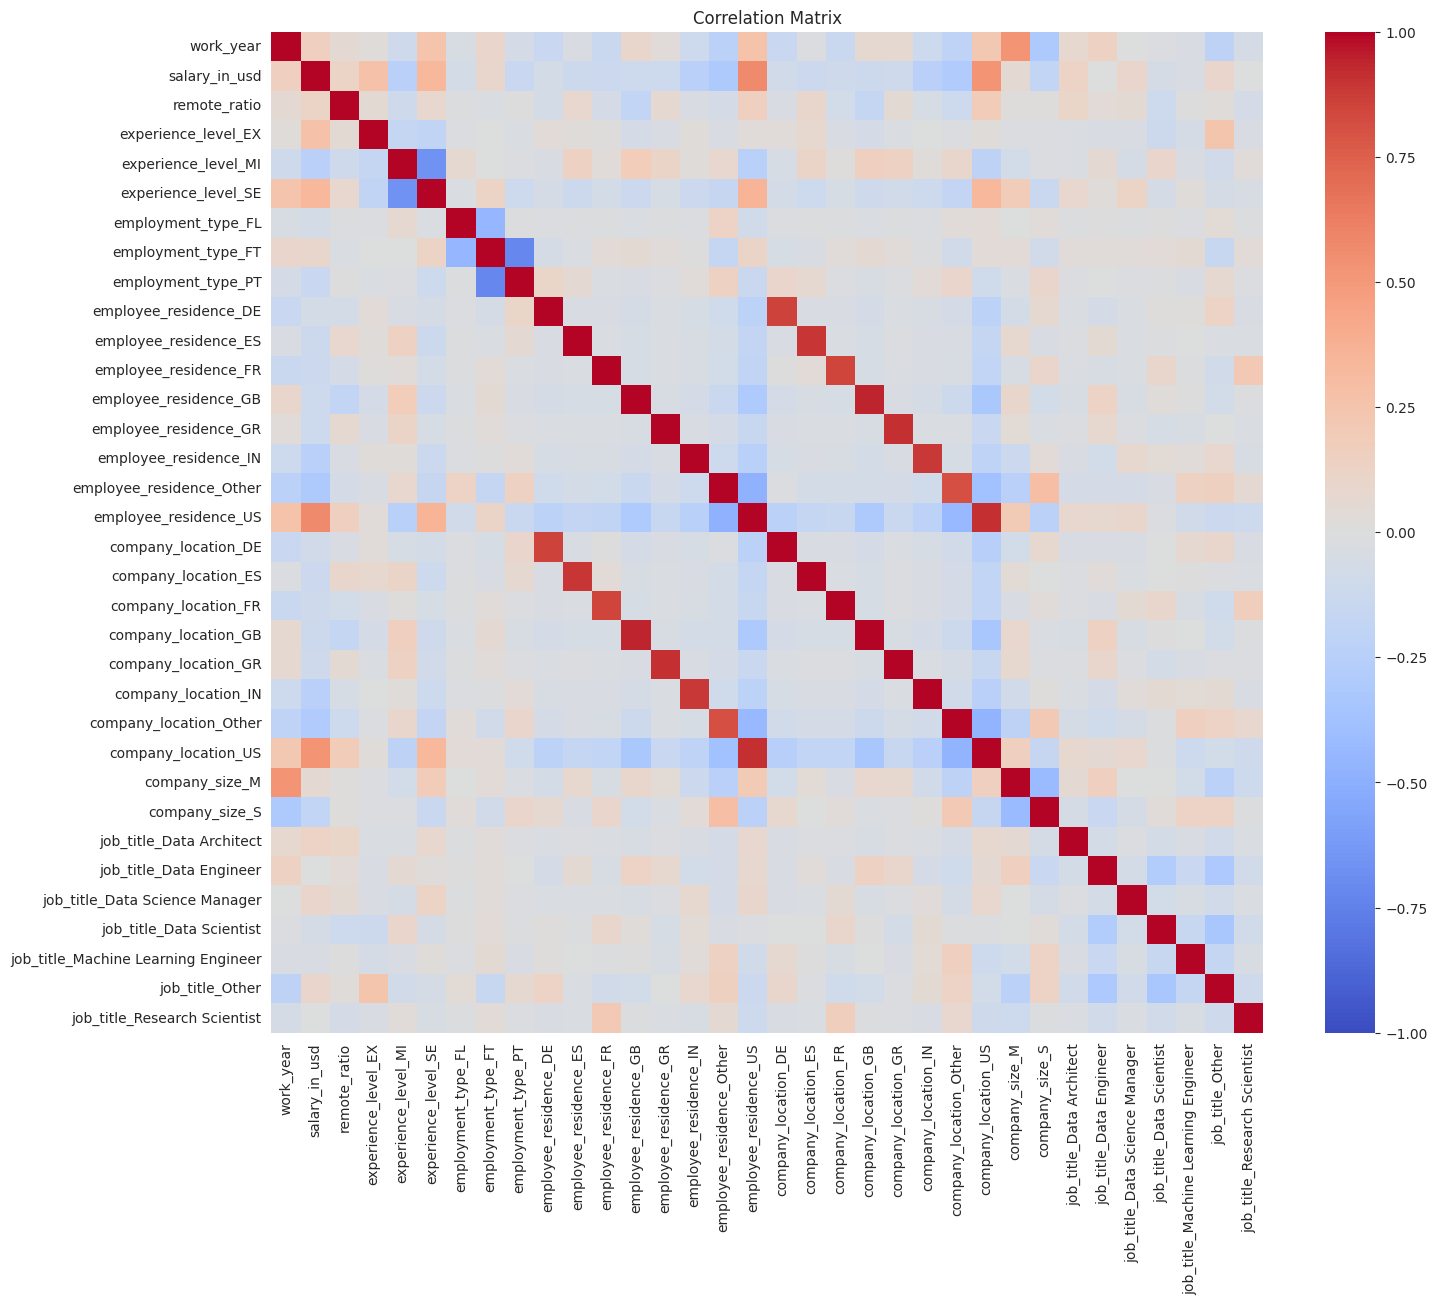

In [28]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 13))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()